In [10]:
#Importing required libraries.
#You dont need to import matplotlib, i just used to to create the graphs
import gym
import numpy as np
from IPython.display import clear_output
import time
import math
import random
#import matplotlib.pyplot as plt

In [7]:
#Q Learning Training Code

#Create the environment
env = gym.make('CartPole-v1')

#Create variables for q learning formula
learningRate = 0.1
discount = 0.95
total = 0
totalReward = 0
priorReward = 0
Observation = [30, 30, 50, 50]
winSize = np.array([0.25, 0.25, 0.01, 0.1])
#Create Q Table
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape
epsilon = 1
epsilonDecay = 0.99995

#Converts state into a discrete value, taken from kvrans.com
def getDiscreteState(state):
    discreteState = state/winSize+ np.array([15,10,1,10])
    return tuple(discreteState.astype(np.int))
#For 60000 episodes
for episode in range(60001):
    discreteState = getDiscreteState(env.reset())
    done = False
    episodeReward = 0
    if episode % 2000 == 0: 
        print("Episode: " + str(episode))
    #While episode is not done
    while not done: 
        #If random number is bigger than epsilon value, exploit learnt values
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discreteState])
        #Else choose random action
        else:
            action = np.random.randint(0, env.action_space.n)
        #Do action
        newState, reward, done, _ = env.step(action)
        episodeReward += reward
        newDiscreteState = getDiscreteState(newState)
        #If episode is not done, update q table
        if done == False:
            currentQ = q_table[discreteState + (action,)]
            maxQ = np.max(q_table[newDiscreteState])
            newQ = (1 - learningRate) * currentQ + learningRate * (reward + discount * maxQ)
            q_table[discreteState + (action,)] = newQ
        discreteState = newDiscreteState
    #If epsilon hasnt gone below 0.05 and episode reward is better than last episode and the current episode is greater than 10000
    #Decrease epsilon
    if epsilon > 0.05:
        if episodeReward > priorReward and episode > 10000:
            epsilon = math.pow(epsilonDecay, episode - 10000)
            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))
    totalReward += episodeReward
    priorReward = episodeReward
    if episode % 1000 == 0:
        meanReward = totalReward / 1000
        print("Mean Reward: " + str(meanReward))
        totalReward = 0
print("Training Finished")


C:\Users\Nicholas Page\AppData\Local\Temp\ipykernel_12304\803818635.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discreteState.astype(np.int))


Episode: 0
Mean Reward: 0.038
Mean Reward: 21.906
Episode: 2000
Mean Reward: 22.133
Mean Reward: 22.66
Episode: 4000
Mean Reward: 22.399
Mean Reward: 22.336
Episode: 6000
Mean Reward: 22.407
Mean Reward: 21.984
Episode: 8000
Mean Reward: 22.213
Mean Reward: 22.438
Episode: 10000
Mean Reward: 22.251
Epsilon: 0.9753093024395111
Mean Reward: 22.557
Epsilon: 0.9277417467531685
Episode: 12000
Epsilon: 0.9048351558698463
Mean Reward: 23.317
Mean Reward: 25.36
Epsilon: 0.8394533480303666
Episode: 14000
Epsilon: 0.818726659298009
Mean Reward: 26.951
Epsilon: 0.7787959154194878
Mean Reward: 28.103
Episode: 16000
Epsilon: 0.7408126643807126
Mean Reward: 30.428
Mean Reward: 32.147
Episode: 18000
Mean Reward: 35.186
Epsilon: 0.6537628386312633
Mean Reward: 38.775
Episode: 20000
Epsilon: 0.606523077874078
Mean Reward: 41.807
Epsilon: 0.5915475999948323
Mean Reward: 46.159
Epsilon: 0.5626967797130051
Episode: 22000
Mean Reward: 50.837
Epsilon: 0.5352530648457575
Epsilon: 0.5220372933033263
Mean Rewa

KeyboardInterrupt: 

In [22]:
#Random agent code, I followed the tutorial at https://kvfrans.com/simple-algoritms-for-solving-cartpole/
env = gym.make('CartPole-v1')
env.reset()

observation = env.reset()
#Random parameters
parameters = np.random.rand(4) * 2 - 1
#Run episode
def runEpisode(env, highestReward,parameters):
    observation = env.reset()
    totalReward = 0
    #Attempt to reach 200 timesteps
    for _ in range(200):
        #Random action 0 or 1
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalReward += reward
        #If it fails, break out of the loop
        if done:
            break
    return totalReward

reward = 0
highestReward = 0
episode = 0
#For 1000 episodes, run episode and attempt to reach 200 score, break if 200 is reached
for i in range(1000):
    episode += 1
    print("Episode: " + str(episode))
    parameters = np.random.rand(4) * 2 - 1
    reward = runEpisode(env,reward,parameters)
    if reward > highestReward:
        highestReward = reward
    if reward == 200:
        print(reward)
        print("Result achieved in " + str(episode) + " episodes")
        break

Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
200.0
Result achieved in 22 episodes


-0.17523408250702704
-0.060036016201214557
0.04676694972280148
-0.07144636988007128
0.034650667236145766
-0.08434818721205022
0.020922618145501115
0.11741043403011706
-0.01162864445316844
-0.13324380293961804
-0.030681449927235108
-0.15370954842508808
-0.26923660640509733
-0.16037976613287663
-0.06041591783666754
-0.1863286988122287
-0.08817621190803028
0.0006537242942297461
0.07982897214023674
0.14898595808849546
0.2077316498442644
0.2556464042066656
0.0490281947520124
0.02514306227094086
0.005985257144180557
0.02580190226262045
0.0066696602319235646
-0.007517139719826413
-0.01652301852188051
-0.020098422053457243
0.015984103391902274
0.04793243281626101
0.0755819040339851
0.09874813337988327
0.11722849534592056
0.13080332692796937
0.13923728188558682
0.14228087127409864
0.10569051706033951
0.07330441412301027
0.07926910767500392
0.07969878673459793
0.04028404855330049
0.03896950156476989
0.03175972806480043
0.018390954119295977
-0.0014008348435472495
-0.06303925375437508
-0.037693301

-0.3368587560996868
-0.5146554254940636
-0.37729196775348917
-0.26424717360447003
-0.05029209669113829
0.16643460567068047
0.38739291150938293
0.6140604927181561
0.8479140639738502
0.6285979291596481
0.8720093040133478
0.6620950470078312
0.9149133841446229
0.7151217684183311
0.9774058714291143
0.7886910938261935
1.0606753717998758
1.3414632778249571
1.1769838205540235
1.0178693385032216
0.12885868190428115
0.2570288341409837
0.12804538470730667
0.0047848093891395965
-0.11446375443247206
0.0250289244481067
-0.09568690920772001
-0.21394859775714492
-0.33142049891372577
-0.4497129765540596
-0.5703614191663055
-0.6948028278848034
-0.824346374327003
-0.7054243544993047
-0.6006598399860702
-0.5085400406841178
-0.6741493770116281
-0.11305298048670656
-0.006531789103232351
-0.10712496650450759
-0.00033336759481233014
-0.1006330129827234
0.0064790351703295215
-0.09347383344579398
-0.18770536152361605
-0.2761360057103001
-0.35865637500124753
-0.23338252969555204
-0.11301637212529299
-0.199294489

-0.056431782927836405
-0.08112292929561336
-0.05161907997500019
-0.0233520978307518
-0.05004140781774874
-0.022080545647944212
0.005056828848525305
-0.02232903053266495
-0.04875604668326346
-0.07466258611639681
-0.04635970232608158
-0.019338799781714718
-0.04730388718406274
-0.0748065835419488
-0.04818364427084401
-0.022938236439955975
0.0013512409637688183
-0.028924562924836337
-0.00432926393063425
0.01973564388818244
0.04372459499052844
0.013968395555570723
-0.014061006861540493
0.013360458211404247
-0.013311435959570198
-0.038577472813742
-0.06285827671342777
-0.08659375594030616
-0.11023807569657806
-0.13425459042658014
-0.15911022126472776
-0.18526867741732417
-0.2131817008663584
-0.1896626293630908
-0.17031348298893817
-0.2070873672208272
-0.19437457358147536
0.2741551347405647
0.6071018919853495
0.28037780771306064
-0.04374238887746679
-0.3662277891882821
-0.6880462068339654
-0.3505135443325575
-0.015364251529191512
-0.34148800096529297
-0.00690223625817233
-0.3335496740480207
0

0.9803020042457844
1.0952091980117018
1.2075475411261811
1.3180206760499797
1.4273107682072532
1.536063992244428
1.4653657484566178
1.401469036007343
1.343748951011544
1.2915616683632591
1.244255357720112
0.3674725389313846
0.7435140965662994
0.34919741215747063
0.7298835539206574
0.3402136573590297
0.7253543593232216
0.340391214907249
-0.035787464427790766
-0.40470053702949194
-0.7678666843977187
-0.361212109663942
-0.7283876296992138
-0.3251386617471582
0.07026123650374498
-0.3068528422305916
-0.6776570630784255
-0.27751302864283406
0.11499141406208471
0.5013542445724358
0.1168166470707519
-0.25963125433585654
-0.6295100978472645
-0.994330129375935
-0.5894107403907101
-0.9595696484771399
-1.325927891848924
-1.68989846561374
-2.0528005813323276
-1.6499642288631429
-1.2606255275072575
-0.8834159879390905
-0.5168924696297825
-0.9211525836699106
-0.5603328197441502
-0.20918265901987843
-0.6249414343256079
-0.27756220695426825
-0.6959219698970606
-1.1096160342594659
-1.519798988775063
0.0

-0.04887611783509607
-0.12709341528823898
-0.06264315347188093
0.0073471037759613245
0.08276235355467707
0.015735209433705936
0.09115824711615315
0.17196190179934379
0.11029891983046944
0.043317562166476684
0.11894988722288824
0.20009733340853458
0.13888992452070084
0.0725191182144186
0.1489571011786011
0.23104540065548396
0.3187220061288881
0.41194468192571826
0.36276746512291924
0.4566325536020719
0.556179213593237
-0.14361749847603716
-0.2892332692641746
-0.4290004553794068
-0.24350139730441495
-0.06855892052969446
-0.22351982633738698
-0.3722635583612681
-0.5158732087609524
-0.6553586406825486
-0.7916330133631606
-0.9254861967941228
-1.0575522269016961
-1.1882722226041746
-0.010695534239739783
0.01661727053410811
0.04629908803606189
0.07800876701490045
0.05749148178143573
0.032690719891691894
0.05833577800313405
0.08600893288055372
0.060478069836217674
0.08585887619692406
0.05704618304562398
-0.14063738366380377
-0.02772004757367791
-0.14619198307484504
-0.03364645562106288
-0.1525

0.2896498486008773
0.201357455087216
0.11742852504947715
0.1871373218264028
0.10332908852212301
0.023677509092078847
-0.05197521984691582
0.02562037403291573
0.09887299871917543
0.16791148496346442
0.2328440032868397
0.14441381516957041
0.20948664346644527
0.27043450031453514
0.17823414777966795
0.23917293237699627
0.2958740550838035
0.3483267620150845
0.369789647724848
0.7387989625841009
0.3691180370623489
0.003756297125679342
0.37932595039437866
0.7530052498591446
0.38820196101835125
0.02780746912325331
-0.3295327607773562
-0.6851589718736819
-0.3028375486327141
0.0754008845097838
-0.2869668493071001
-0.6472368572074733
-0.2688683039092864
0.10566723660427015
-0.26033793039384834
-0.6239842622373832
-0.9865901068076536
-1.3494220478469359
-0.975500536671934
-0.6077157294116753
-0.244741559060628
0.11477288867247107
-0.2655748914736785
-0.6432784275983494
-0.28187291351586363
0.07588360820328258
-0.306124093159623
-0.6856609965584033
-1.06399868499774
-0.7052375752973041
-1.0883530421

0.03444692817503227
-0.06033086891797614
0.03301964221091774
-0.06212141215240198
0.030874279755519735
0.12215364679171618
0.21142350966379075
0.2983958921355948
0.3827876279637239
0.2772397342094913
0.35910620825730283
0.43814631840093554
0.514082688773553
-0.266280144668392
-0.493077669671812
-0.26743179447869625
-0.4980346268772825
-0.7290737347447048
-0.5092069883560043
-0.2941717703596445
-0.08268275764905435
-0.3248125427622525
-0.5662588001386034
-0.8082122531327689
-0.6015586171830267
-0.8494899615925265
-0.6509528351447924
-0.9047074098544032
-0.7150546818768679
0.24334849576119152
0.02809979337194317
-0.19268111644630942
0.026206325410420478
0.2505911960562548
0.48119411020122727
0.2728162253856439
0.505587549900432
0.745351036323112
0.9928254766527027
0.8032304974185582
0.6108128208190545
0.8594912511389241
0.6719044588265023
0.4812303440252398
0.28683314096704265
0.5305318897786528
0.7812870258129334
0.5979747670728983
0.41170192300390585
0.22184777468576122
6.0757260208460

-0.03546103948666496
-0.10956633645928804
-0.01923993755586878
-0.09747161335276622
-0.011000144373801729
-0.0932941087408296
-0.1786963838912119
-0.10060171137057744
-0.02489114322155586
-0.11785600447221461
-0.21416249585669767
-0.3149769789161019
-0.4214365777615302
-0.5346218419000318
-0.49232529202840536
-0.618797537460525
0.03404016441970267
0.01391799175621356
0.03229818254470419
0.04695901780457947
0.05776219528009183
0.029940206005845113
0.04025712927882723
0.011878562629477625
-0.013057368415921217
0.00015523678870373037
-0.02534171462623145
-0.047378328999064336
-0.06585393232155183
-0.08064816439239171
-0.05697212881150209
-0.0716754325033786
-0.08251440588984923
-0.05472437156357625
-0.030465493545257925
-0.044423943110186485
-0.019784719634464754
-0.03331770951222372
-0.008187302653964432
-0.02118889947191062
0.004554775968028252
0.026868047385779616
0.04565180481513459
0.02610647962622184
0.010493202959953395
0.033606218633987536
0.018542364041105493
0.007576513312566119

0.7490140353275642
0.3749764498478107
0.7758054614614458
1.181582137077945
1.5939506719167806
2.014482644589812
2.4446279266713535
2.8856568506388904
3.338590917960021
3.0423832122719405
0.037897637666103566
0.09659114044956656
0.15647210612347584
0.2180025953607046
0.2816179598237898
0.3477159726117452
0.3076907748862388
0.37834679447108255
0.45163878955554965
0.2072828804005008
0.010244215167176055
-0.18437488269763203
0.0035087462317280414
-0.1918821218290178
-0.3859011514733969
-0.5795382457035815
-0.7737413994109981
-0.5889537960642142
-0.40977702938808724
-0.6143246973053627
-0.8192829838820458
-0.6478751650614193
-0.48266308332453056
-0.6974111790109504
-0.9125392701415768
0.024429277725101922
0.02823944233045158
0.03728581281683427
0.050505338140946654
0.06687477956730004
0.08542307022035933
0.07665247703858902
0.05985690814744232
0.0361469573166312
0.006616159137354666
-0.027669093527457958
-0.03493762115516294
-0.037227398889562335
-0.035549035683235974
-0.030862109241674096


0.5420510210953984
0.7035395993624123
0.5827201141250944
0.4597404363542973
0.3344104011455483
0.49277078822531684
0.6558989917157846
0.5383976140501365
-0.02730903210054957
-0.0856499376396537
-0.136310096562209
-0.04827106052304936
-0.09876439897086559
-0.010448967893250567
0.0704881944342055
0.013293906371770841
-0.0358244125196386
0.053979420338398414
0.005917806193283956
0.09680447975419
0.18077715004576875
0.0663180471767642
0.13649284031429593
0.2051655427155782
0.2720396280231707
0.33681290528485325
0.39917901980699905
0.31220200684754235
0.22410786450762465
0.13508256639142746
-0.0992592093840189
-0.20152798206779107
-0.29910286230632205
-0.3925105771762634
-0.2752795030445632
-0.16559635729445482
-0.06280436402141376
0.03374683722797235
-0.08049779211000728
-0.1893723223042134
-0.08875342286241222
0.005349567916832582
-0.10979142188117308
0.40967142966185244
0.7756677000771001
1.142785473581542
0.7953166037166954
0.45416979787378475
0.8338453862335972
0.49905680422079657
0.88

-0.23014808532012995
-0.026368012862569082
0.17459431008477022
0.3738683177810888
0.5725532154678641
0.771703099792467
0.9723113605224475
0.755247757579298
0.5449883823086887
0.7600444706982978
0.9758490273327708
0.7746540732930441
0.5805482450221847
0.8088714252011828
1.0375410918359789
0.8534426447351342
0.6771075783368369
-0.12246251425289255
-0.23044577460874927
-0.33995134794033105
-0.450893440335427
-0.3496460923651009
-0.45997121902635124
-0.3580147951674203
-0.4676264288063604
-0.5784473038501082
-0.47668539848211655
0.07119587175540232
-0.03463625834642325
0.07843079051764362
0.1961703212143032
0.0960792452312306
0.2152839363593187
0.33962819966611435
0.4695253361303896
0.6053670460593243
0.5255478440920412
0.44401567852685064
0.5810348334125681
0.7240158912909187
-0.29313930593058135
-0.07443782140886476
0.14655279234035798
0.3712820145130229
0.13620960674293559
-0.10083244002041587
0.12398979938301434
0.35238766066490157
0.5858308294965744
0.36042544918798025
0.5999043671149

1.6439181327526482
1.3318489548224455
1.0232575927397298
1.34381222912586
1.6633345575077436
1.9828782487773704
2.303445839965814
2.6259603283895743
2.3257166192159904
2.6570397523787754
2.990726815820361
3.32735078411082
3.6672625552876297
0.16932155346309502
-0.0164442146304562
0.16763851082353295
-0.01737804316353833
-0.19984312699783408
-0.013267859936896012
0.17073240526160285
-0.014344495388935534
-0.1968479735907681
-0.37756871777248385
-0.55727745971768
-0.7367100663885267
-0.9165517874353584
-1.0974192703161132
-0.9134050419075795
-1.1015639964086987
-1.2908428531078193
-1.4815843354692442
0.1100831909978377
-0.01880810429924974
-0.14251747224450478
-0.2623329550189319
-0.37950618211745846
-0.49523364846139006
-0.3617778004246418
-0.4859188019679712
-0.6094228849274231
-0.733290007718782
-0.6131259629596659
-0.7482629566991462
-0.8840044449374502
-0.21185254510219848
-0.01656454965180378
-0.216073640042878
-0.021227328228447882
-0.22116603597018428
-0.42305614283645365
-0.2310

-0.02981265613330075
0.010398161974298215
-0.03715382219823732
-0.07681184346399336
-0.10927498143118153
-0.13520008859511845
-0.15519228525650314
-0.08976395772498619
-0.034473022350882704
0.01146653741777412
-0.03002447865817698
-0.06450107862153509
-0.014439462091982491
0.026206367173211037
0.058204313804548546
0.0062626413093310185
-0.03806368442809299
0.5558066205451888
0.11512830010338566
0.5744795933454869
1.03671774430841
1.503662234413842
1.9770962327149233
1.5599513832612746
2.046839362604252
2.541913639595017
2.1530118225827497
2.664620175401876
2.2991654943599134
0.41415059505945373
0.793051997172441
0.4384287191385463
0.8214203060714427
0.4713197577776921
0.858591632394999
1.2515043810522308
0.9137241903327351
1.3137140157709157
1.7207065312254115
1.4010941623067206
1.8177241491619194
2.242481324249007
0.1410818746794909
0.26444983916430054
0.14985279161411938
0.274104952979646
0.16046411765140386
0.2857703394062144
0.17330723655864133
0.0578783730481996
-0.060798058144176

-0.3537760396886087
-0.6458970414228865
-0.36827873950145446
-0.6632521260686113
-0.961438642309674
-1.2636125923513168
-0.9986049860295407
-0.7358257257614054
-0.4746784163940267
-0.7842147890980231
-1.0975148695213688
-1.4152414585047652
-1.73798330389489
-0.1058841436169726
-0.19444887093998767
-0.2775398873527938
-0.16453429392772287
-0.054590237018756566
-0.1384035866122345
-0.026059068095574872
0.08303661797324592
-0.0021746502078090757
-0.08184115015707821
0.03539393540499902
-0.04131370889387359
-0.11176534437442542
-0.1754236263893983
-0.23173706765089586
-0.28014789652635563
-0.030243782245832324
-0.13071635571180212
-0.020513388298430357
0.08700253176102588
-0.018695074934962586
0.0879732433738411
-0.018557102745067666
-0.12471351556354365
-0.019960004968822442
0.08212743847407394
0.18303412696993412
0.2842432765155536
0.17522879402187597
0.28146515199670147
0.1773733969074614
0.07655384380688116
-0.02247374503621072
0.09057862977942084
0.20246122064140232
0.314654039932239


0.0026669753030453894
-0.032347101218916416
0.005675994301635987
0.04100627470125787
0.07464092311760273
0.10754693612744876
0.1406484587498138
0.1748140548383169
0.21084139064463292
0.24943928491697975
0.22288044956204012
0.20573451303064394
-0.21244287864558453
-0.0441398092405363
-0.1957175243626651
-0.34044852563514066
-0.16778327749444386
-0.004351665074201017
0.15096079580958438
-0.012385512756987158
-0.16761863608388414
-0.004197641090465075
-0.1605246305152472
0.001844905343132932
0.15612335156598714
0.303399939217805
0.13309182306323644
0.2835420402118442
0.42788963253117235
0.2556061910035432
0.09345847405795643
0.25138166949336793
0.40295191661162916
0.5491301649009588
0.38074745596755655
0.5328168768474946
0.3719524114800074
0.22262393733771463
0.3889798676762552
0.549432064024105
-0.1980040796635355
-0.4373678928439284
-0.6778859698116079
-0.9207121486518637
-0.6799650712890962
-0.93056315867267
-0.6979224922227852
-0.9558780953875835
-0.731714143478583
-0.9967500063808148

0.263541305353414
0.32418727403648995
0.3827376375325264
0.2834086198232513
0.34857457574455997
0.25668262429582256
0.3276335018306403
0.2434189625731557
0.1682592517997027
0.08048014506366089
-0.029105298572718277
0.07800195553837405
0.18850827425788538
0.30311963277438414
0.20274601067403167
0.10077837440931278
0.2163270626693069
0.11645104240457033
0.014495702639993108
0.12934007990112284
0.24793365846665083
0.15150486792512335
0.2725615158036554
0.1790078581418456
0.08385864481366928
-0.013522512127171926
0.1049432638464524
0.2270368432404148
0.13467203596182692
0.040421412094072934
0.1620604522048169
0.0691762218243179
0.19225846873352806
0.10111907237209673
0.007843581557598373
-0.08823102787564392
0.0303907350716644
0.15219975537324168
0.2778396533636589
0.18961821479895558
0.3178703582245225
0.23292816860690133
0.36418753943199395
0.2831107251637076
0.41781638786987885
0.3412944314879359
0.26427065211739414
0.18617324334695934
0.10640346823687866
0.024338781979236584
0.15422265

-1.2872371720737368
-0.2320213824950539
-0.4012012940739735
-0.5713946443223132
-0.7438276915938089
-0.9196821759601728
-1.1000642188251524
-0.9690244376649396
-0.8481771926256474
-1.04818152263997
0.024428023281531923
0.010538673962687515
0.0008926712601151909
0.009408209523401104
0.013949749727269055
0.0006513121177665893
-0.008467100926841567
-0.013940871036439428
-0.016268071911414828
-0.01590254438485411
0.0007854750741227434
0.011906747006267149
0.004862824228022478
0.0008847265430996232
0.011902743005896166
0.017438097336900216
0.2435794146012117
-0.001840856341134546
0.23366287982960088
0.4607070337253254
0.6797265460167429
0.41921554767151137
0.6402197810778314
0.3817481031865042
0.1329519930468212
0.36436733268060495
0.11632400513318801
0.34799244964145726
0.5710517916796174
0.7857924185832472
0.5231067791415674
0.7388112856353484
-0.060928835006682114
-0.002476516375856684
-0.06000972896185042
-0.11393672686172651
-0.16552492255049028
-0.10509836224792424
-0.1629116801706727

0.04951256107946666
0.050623138542709965
0.057493749333884375
0.08162789110346397
0.0892498158621895
0.1028355281870714
0.13402911975688395
0.14882612815767426
0.16982763530738082
0.20902105424006878
-0.18612477029178587
-0.36677387747520457
-0.16763631748988272
0.029876489700372544
-0.1556624280503755
0.040677278738147235
0.23699422752840124
0.43481433848130097
0.6356396180753943
0.4582787451188124
0.2848444549890873
0.49547064563998416
0.3278461106983212
0.5435328740260693
0.7623848579530439
0.6066242506661521
0.45590116639427997
0.684992548137061
0.9175657310019458
0.7815568645511191
0.19318384554389628
0.3581431073118636
0.5220057219316252
0.6855427476133585
0.5070452767079503
0.33396654865383
0.16552267051674865
0.0009012429060777337
0.1809906711842022
0.35905984087503634
0.5358825016009403
0.3710413448272369
0.21125152952704665
0.05571303479033976
0.2432040169551333
0.08957089833215162
0.2785047673490634
0.12729529557766603
0.3179598585680967
0.16976490316221962
0.025916257897542

-0.14880300069005292
-0.10290073172223724
-0.15814696058401712
-0.11982392624545884
-0.18094676284796163
-0.23947850577419483
-0.20933526851058082
-0.2754343367132709
0.19213454577845407
0.397993267066837
0.6044231608073856
0.3998750497845711
0.608794861527833
0.4068169668789261
0.20638110887412647
0.00694862122299489
0.21939820689558326
0.020464438530320584
0.23335136012034147
0.035083809153138634
0.24852957665758835
0.46212232054427976
0.676327269356316
0.48116482017878376
0.2880859558211897
0.09656606913793586
-0.09392550325838663
-0.2839175851490499
-0.473931919444776
-0.6644793716217328
-0.44750792001833406
-0.23139831975698322
-0.015711258839735842
-0.20892541618781393
0.007152880739884737
-0.18496668261109456
0.03171152120226295
-0.34787528522411976
0.019366729130777735
0.38131000332541587
0.7395216276427069
0.37152704820106447
0.010421864702394751
-0.34535578950646795
-0.6973807135051537
-1.0472122298724553
-1.3963671468526067
-1.0222576883256889
-1.3818020268589524
-1.74184327

0.10899835731984531
-0.07909116304516511
0.11006934564563153
-0.07829569558349801
0.11061928274011483
-0.07797039481872754
-0.26825915275115064
-0.08280870199287628
-0.2764091445923203
-0.0942528897582944
0.08782970028893566
-0.10748466629472206
0.07438608593498293
-0.12119453905947922
-0.3185819308695366
-0.5193469510466613
-0.7250317875345546
-0.5587652963188275
-0.39631884214181123
-0.6131130212825588
-0.4585250824823507
-0.6820030804976133
-0.5360853482773612
-0.7665440279084201
-0.6303522160126999
-0.8681560775480732
-0.7430236153799364
0.07122404768345747
0.02471437361073758
-0.025694498274906497
0.02078187660327735
-0.029127573156737852
0.017813825720556734
0.06910489558795443
0.023954585843190993
0.07564203051947235
0.1317002990514176
0.09138072374863668
0.047243225624740315
-0.0006404699937264108
0.048511800338648416
0.10220828000125512
0.05969085720536425
0.11423617015399756
0.07264830446193177
0.12819997266372965
0.08771147451551031
0.14444928898638137
0.10525459862389618
0.

0.08798155456839261
0.014837529946349723
-0.05576787414919501
0.017124787329113437
0.08743661842021223
0.15530024244351476
0.22081801355200534
0.2840582904382539
0.3450520106404986
0.40378891578525616
0.3192978638188727
0.23750036785804773
0.15812943572258378
0.22129418962714206
0.28140809334065753
0.07890953062836004
0.08023304247781816
0.08222073446079348
0.0952604958312041
0.09884164435185874
0.10420135953382881
0.11236182779705639
0.12432520222215993
0.14105709031125457
0.17498122183870057
0.214149442347367
0.25771530631580114
0.2886267375993594
0.3413014824634659
0.6701894730282318
0.9924902053968061
0.6219526298432634
0.2645867877167786
0.6063914975828771
0.9411493587293732
0.5830136282953843
0.9249736059206972
0.5747708417891236
0.923533996490171
1.2664231589189698
1.604745918644692
1.2579396205357205
1.6074710752550243
1.9529452930502715
0.28895304936298244
0.015764804655805258
-0.2534576188306671
0.016182574987159637
0.2819383059296305
0.00895243329528963
-0.26011245987114134


0.8404266711423576
1.1243920512847463
0.8726973927323181
1.1653577226541856
0.9219135934009143
1.2229340574739709
0.9881435045068598
1.2973878494395505
1.6156183986657267
1.4012560552461388
1.1889615402537008
1.517298262191618
1.3163504574449894
1.6533217859730542
1.4651854174768018
0.09383945789622541
0.16991174227225908
0.25001033401529726
0.19876355097713802
0.28360936239406276
0.23784067909571577
0.3277057844430185
0.28806864448141345
0.383312266473061
0.4840250699302895
0.45869609982521653
0.436147185534598
-0.4475526883473193
-0.00633219171719341
0.4317738066332907
0.012221130399990156
0.45174338294557026
0.033835486419392866
-0.38114442484022826
-0.7950865144160335
-0.3536157272376156
0.08345464412268369
-0.3385560699741105
-0.7591407455881625
-0.3235738790972425
-0.7488883081983218
-0.31775593117171397
-0.747475768316452
-0.3206465212992603
-0.7545640251650206
-0.33201355223801127
0.08636313398829572
-0.3538315805014909
-0.7923972311131693
-0.3749526960251278
0.0380694926313645

-0.6892842583547552
-1.0182835546144633
-1.3525548957518558
-1.0966981955843471
-1.438420846866359
0.09436721104668586
0.24149571975709713
0.3859420245035058
0.23677847193917737
0.09523596912834431
-0.04004987450396092
-0.17043332400553723
-0.2972415903180359
-0.4217610856397147
-0.5452249905184289
-0.3767866290221571
-0.5090698165242022
-0.6409737235204712
-0.4811746257424866
-0.6230880722046761
-0.4735382790696491
-0.33365500872738224
-0.4920000505229255
-0.6489472128980015
-0.805517232491431
-0.9625782815603424
-1.1208068729327447
-0.11448215352996764
-0.23995614809181542
-0.36577325629505236
-0.49265931867298945
-0.6213093639918662
-0.5029768672475806
-0.6377446094729109
-0.7747961218638288
-0.6676134050114878
-0.5661641626944335
0.4465950802214377
0.01686783462991126
-0.41780956369314337
-0.859142905001752
-1.3088579928898423
-0.8964983019328963
-0.48268436037762774
-0.06583136676610862
-0.515767124276215
-0.9727681926820517
-1.4385253830624074
-1.043914989157596
-0.64895316778984

-0.023004957231229653
0.24030398856061108
-0.051426073950961715
0.2127799996968337
-0.07818248278117286
-0.36383512255924755
-0.09494065078044019
0.16773257861925536
-0.12418150035499115
0.1383252391638429
0.39542260569288684
0.0993125738628654
-0.1911731111894804
-0.4769293419657138
-0.21068986557324945
-0.4987231354037409
-0.7828255646867248
-0.5187565829319447
0.39316400924058725
0.782998677328733
0.4373562625119957
0.8314100634436272
0.4907432887574963
0.1458032275639917
0.5386646087497653
0.9401462516123353
0.6087192008642816
0.273827534493714
0.6755827235572467
0.3456225004776001
0.011589895056906316
0.41194436098744647
0.8210298109778826
1.2399163135999867
0.9321339609999659
0.623347846020093
0.13483459076578208
0.00802985734681571
0.12849862203573426
0.248290873802748
0.12128775360001742
-0.004604953281675891
-0.12971061195249023
-0.00785068773851057
-0.13355178680693505
-0.25881377007636
-0.13754996762468027
-0.017793966833052913
-0.14543781336927888
-0.026523325701788062
-0.1

-0.4795447098696912
-0.8976124721160493
-1.3200008491760458
-0.9046458313615373
-1.3352883687830093
-0.9281668909153258
-0.5236205674061518
-0.1200651813358104
0.2841286013427043
-0.15191377060829964
0.25338411296774693
-0.1818863581619592
-0.618684620582643
-1.0586071083522903
-0.6608636982758325
-1.1067349315120718
-1.5573888757748469
-2.014272136767456
-1.63997223621337
-2.1085145244493684
-1.75049961814614
-1.40001380103153
-0.07958770067433515
-0.030313433765233364
-0.06709317919603891
-0.10221157569787392
-0.13486375891672264
-0.1642687484567633
-0.10388378879910731
-0.04158145902150018
0.021847232615139323
0.08561219610517504
0.06105629231238199
0.03849040767239725
0.10720848915946984
0.17680540365458192
0.24652139595115302
0.22514364915257812
0.2962902072980661
0.020508597536818635
-0.0747836987350595
0.008938861135476317
-0.08518421566833853
-0.00031418557121118407
-0.09335361143399518
-0.0074179146793435236
0.07491029632422802
-0.019108674718325003
0.06741931916750737
-0.0223

0.3117270529034445
0.6529745695461998
0.3032726771844989
-0.0473593169435208
0.2958859830241858
-0.0538171452108166
0.2903521992069053
-0.05848756782089135
0.2865410879838291
-0.06147939582750211
0.2843670964526525
-0.06285776444701689
-0.4126947335401966
-0.07033281819043012
0.27372160397743484
0.6211241565981347
0.9735552926388478
1.332689652164735
1.7001633023080296
1.3815748511863406
1.0677870980141848
0.7574453862867416
1.1419773855739124
1.5336287706604579
1.9338962659180536
2.3441437988523752
2.7655371806381637
0.22141142850189297
0.4328586101504891
0.21633286355497064
0.43257835576480186
0.22076160703384673
0.44169573271774915
0.6651426610012058
0.462380797609846
0.2637295057775458
0.06771517130668386
-0.12717487386638004
0.10655357640823933
-0.08881233291322409
0.14476300648658774
0.37864444951741866
0.6143434650150502
0.42469905129578644
0.6666949186386785
0.4849392799157199
0.30746794400258814
0.13283172314487962
0.3842469069658472
0.6371905343504187
0.8930795699351324
1.153

-0.6651666463054231
-0.6209297404542028
0.09055116222323761
0.001993721821465964
-0.08164124346735666
-0.15994350713828123
-0.06556457022223862
-0.14256117158258347
-0.04676578010902288
-0.12229513726435454
-0.024863291722470288
0.06835690503255698
-0.010138134678383301
-0.08293919420359855
0.017605413264987588
-0.053138644452416395
0.049826633808527726
-0.018568569951494945
0.08722059784866161
0.18950001029134905
0.11977160999016369
0.05637388167589674
0.16828269419692887
0.2772238779685132
0.38291195499098996
0.3155371154529589
0.25466457851044577
0.14831547246765645
-0.031289879745699585
0.15168865887522998
0.3379249827619536
0.16160203417092003
-0.01792397111389058
0.165187783016148
-0.014239849843486507
-0.19685992188226958
-0.016857029884315953
-0.19940345762342387
-0.01933011533648125
0.16403230333539476
-0.015141829730192862
-0.19750273285047223
-0.01723493641934274
-0.19950698134049483
-0.019151370249331223
-0.20134054436658583
-0.020902728275087663
0.16283304300876691
-0.0159

0.17244793420950902
0.33337780307678755
0.1616988744903221
0.32440746372295254
0.15447904840087123
-0.010991953883199533
-0.1725420312899265
-0.33071064083769186
-0.15617621831365616
0.014156232136655327
0.18081635121658043
0.3443330373922846
0.17534376741124857
0.3407178109410868
0.17373418911011443
0.011384944967903564
-0.14686672582153562
0.027815039609773894
-0.1304478252506469
-0.28506323968496555
-0.10720817901548031
-0.2627021791113893
-0.414981733004967
-0.23504212829168164
-0.05936580576450519
0.11256529963796293
0.281271590678855
0.44726021396080634
0.281575399027926
0.12109867612929054
0.2941203315394826
0.1358342113994916
0.3105819489161565
0.4826681305329057
0.32511784968879787
0.17328775887329265
0.026677969065992957
-0.18859862261878885
0.03451563919593266
-0.19061050609136615
0.031739694754979904
0.2511945334611557
0.4689264621468977
0.6860704568789497
0.9037036160747732
0.6776352860363555
0.45829330565140325
0.2445078868261352
0.4789772756499509
0.7124620443270668
0.50

-0.3475289472753271
-0.09363172470295053
-0.36723277747046373
-0.6407022940063275
-0.9157973989550385
-1.1942305461087923
-1.4776306316560224
-1.7674977119862847
-2.065150404290334
-2.371661947003481
-0.09993481848687585
-0.04241351550546013
0.019319143822614473
-0.04228312893971437
0.019053900950599296
-0.04295254566933098
-0.10969082764912488
-0.05361475656074798
-0.12103739496209445
-0.06574157191141694
-0.006381644048179549
-0.07044185489658597
-0.13938291925405638
-0.08576264442245718
-0.15572571242868624
-0.23077633054661256
-0.31106043440623704
-0.2694354279589467
-0.3516281027445462
-0.43936848869501455
-0.532804879987015
0.009223854311103064
-0.08350445734850978
-0.005472476122392156
-0.09718075456081765
-0.1890133668019771
-0.11123906421061244
-0.033713415583839446
0.04474742835028739
-0.04555470513016044
-0.1349668905204081
-0.2246460323229658
-0.31578407427333666
-0.23860664461530973
-0.3339464269005405
-0.26133953094459794
-0.1906471979793382
-0.29099465358573023
-0.393228

KeyboardInterrupt: 

C:\Users\Nicholas Page\AppData\Local\Temp\ipykernel_12304\803818635.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discreteState.astype(np.int))


Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 6.629
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 4.541
Episode: 0
Mean Reward: 0.699
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.828
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.589
Episode: 0
Mean Reward: 0.336
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 4.636
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 3.461
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 2.917
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 3.604
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.958
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.702
Episode: 0
Episode: 0
Mean Reward: 1.332
Episo

Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 3.675
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.346
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.586
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 6.637
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 3.716
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 6.563
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 1.236
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 2.44
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Episode: 0
Mean Reward: 

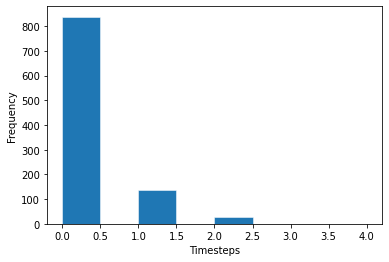

In [9]:
#Q learning agent after training
#Run after training
runs = []
#For 1000 runs
for i in range(1001):
    #For 60000 episodes
    for episode in range(60001):
        discreteState = getDiscreteState(env.reset())
        done = False
        episodeReward = 0
        if episode % 2000 == 0: 
            print("Episode: " + str(episode))
        #While episode is not done
        while not done:
            #Do action and save reward
            action = np.argmax(q_table[discreteState])
            newState, reward, done, _ = env.step(action)
            episodeReward += reward
            newDiscreteState = getDiscreteState(newState)
            discreteState = newDiscreteState
        totalReward += episodeReward
        priorReward = episodeReward
        #If reward is greater than 200, agent has been successful
        if episodeReward > 200:
            runs.append(episode)
            break
        if episode % 1000 == 0:
            meanReward = totalReward / 1000
            print("Mean Reward: " + str(meanReward))
            totalReward = 0
#fig, ax = plt.subplots()
#ax.hist(runs, bins=8, linewidth=0.5, edgecolor="white")
#ax.set(ylabel = "Frequency", xlabel = "Timesteps")
#plt.show()